# Lösungen 5

In [1]:
from math import *
import numpy as np

## Aufgabe 1
### c)
Aus notebook05.ipynb übernommen:

In [2]:
def bisection(f, a, b, tol, termination_criterion='x', print_info=False):

    #check if a or b is an exact zero
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b

    if f(a)*f(b) > 0:
        raise Exception('f(a) and f(b) must have opposite signs')

    def check_termination_criterion(x, a, b, tol):
        if termination_criterion == 'x':
            return abs(b - a) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = .5*(a + b)
    k = 0
    terminate = check_termination_criterion(x, a, b, tol)
    while not terminate:
        if f(x) == 0: #found exact zero
            break
        elif f(a)*f(x) > 0:
            a = x
        else:
            b = x
        x = .5*(a + b)
        k += 1
        if print_info:
            print('k = {:2d}, a = {:15.8e}, b = {:15.8e}, x = {:15.8e}, f(x) = {:15.8e}'.format(k, a, b, x, f(x)))
        terminate = check_termination_criterion(x, a, b, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

In [3]:
def f(x):
    return log(x + 1) + x - 2
a = 0
b = 2.
tol = 1e-6
x_bisection = bisection(f, a, b, tol, print_info=True)

k =  1, a =  1.00000000e+00, b =  2.00000000e+00, x =  1.50000000e+00, f(x) =  4.16290732e-01
k =  2, a =  1.00000000e+00, b =  1.50000000e+00, x =  1.25000000e+00, f(x) =  6.09302162e-02
k =  3, a =  1.00000000e+00, b =  1.25000000e+00, x =  1.12500000e+00, f(x) = -1.21228198e-01
k =  4, a =  1.12500000e+00, b =  1.25000000e+00, x =  1.18750000e+00, f(x) = -2.97406608e-02
k =  5, a =  1.18750000e+00, b =  1.25000000e+00, x =  1.21875000e+00, f(x) =  1.56939742e-02
k =  6, a =  1.18750000e+00, b =  1.21875000e+00, x =  1.20312500e+00, f(x) = -6.99819298e-03
k =  7, a =  1.20312500e+00, b =  1.21875000e+00, x =  1.21093750e+00, f(x) =  4.35413372e-03
k =  8, a =  1.20312500e+00, b =  1.21093750e+00, x =  1.20703125e+00, f(x) = -1.32046333e-03
k =  9, a =  1.20703125e+00, b =  1.21093750e+00, x =  1.20898438e+00, f(x) =  1.51722608e-03
k = 10, a =  1.20703125e+00, b =  1.20898438e+00, x =  1.20800781e+00, f(x) =  9.84791785e-05
k = 11, a =  1.20703125e+00, b =  1.20800781e+00, x =  1.207

Das Verfahren benötigt eine Iteration mehr als vorhergesagt, weil sich das Abbruchkriterium auf die Intervallänge $b_k-a_k$ bezieht, und wegen $x_k = \tfrac{1}{2} (a_k + b_k)$ gilt $|x_k - x_*| < \tfrac{1}{2} (b_k - a_k)$.

## Aufgabe 2

In [4]:
def cubic_root_newton(a, tol, x0=None, print_info=False):
    if x0 == None:
        x0 = a
    x = x0
    dx = np.inf
    k = 0
    
    while abs(dx) > tol:
        dx = -x/3. + a/(3.*x**2)
        x += dx
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}, f(x) = {:15.8e}, dx = {:15.8e}'.format(k, x, f(x), dx))

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

Direkte Anwendung der Funktion newton aus notebook05.ipynb ist natürlich auch möglich.

In [5]:
x = cubic_root_newton(2., 1e-7, print_info=True)

k =  1, x =  1.50000000e+00, f(x) =  4.16290732e-01, dx = -5.00000000e-01
k =  2, x =  1.29629630e+00, f(x) =  1.27593815e-01, dx = -2.03703704e-01
k =  3, x =  1.26093222e+00, f(x) =  7.67094418e-02, dx = -3.53640716e-02
k =  4, x =  1.25992186e+00, f(x) =  7.52520983e-02, dx = -1.01036418e-03
k =  5, x =  1.25992105e+00, f(x) =  7.52509289e-02, dx = -8.10670532e-07
k =  6, x =  1.25992105e+00, f(x) =  7.52509289e-02, dx = -5.21582777e-13
terminated after 6 iterations
x = 1.2599210498948732, f(x) = 0.07525092889403773


In [6]:
print("Check: x^3 = {}".format(x**3))

Check: x^3 = 2.0


## Aufgabe 3
Auf notebook05.ipynb übernommen:

In [19]:
def newton(f, df, x0, tol, maxits=100, termination_criterion='x', print_info=False):

    if df(x0) == 0:
        raise Exception('df(x0) = 0 is not allowed')

    def check_termination_criterion(x, dx, tol):
        if termination_criterion == 'x':
            return abs(dx) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = x0
    k = 0
    terminate=False
    while k < maxits and not terminate:
        dx = f(x)/df(x)
        x -= dx
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}, f(x) = {:15.8e}, dx = {:15.8e}'.format(k, x, f(x), dx))
        terminate = check_termination_criterion(x, dx, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

### a)

In [23]:
def fa(x):
    return x**2 - 2
def dfa(x):
    return 2.*x

tol=1e-6
x0a = 1.
xa = newton(fa, dfa, x0a, tol, print_info=True)

k =  1, x =  1.50000000e+00, f(x) =  2.50000000e-01, dx = -5.00000000e-01
k =  2, x =  1.41666667e+00, f(x) =  6.94444444e-03, dx =  8.33333333e-02
k =  3, x =  1.41421569e+00, f(x) =  6.00730488e-06, dx =  2.45098039e-03
k =  4, x =  1.41421356e+00, f(x) =  4.51061410e-12, dx =  2.12389982e-06
k =  5, x =  1.41421356e+00, f(x) =  4.44089210e-16, dx =  1.59474291e-12
terminated after 5 iterations
x = 1.4142135623730951, f(x) = 4.440892098500626e-16


### b)

In [30]:
def fb(x):
    return x*np.exp(-x)   #verwende numpy-Funktion, damit Feldoperation für Plot möglich
def dfb(x):
    return (1. - x)*np.exp(-x)
    
x0b = 2.
xb = newton(fb, dfb, x0b, tol, print_info=True)

k =  1, x =  4.00000000e+00, f(x) =  7.32625556e-02, dx = -2.00000000e+00
k =  2, x =  5.33333333e+00, f(x) =  2.57490666e-02, dx = -1.33333333e+00
k =  3, x =  6.56410256e+00, f(x) =  9.25596782e-03, dx = -1.23076923e+00
k =  4, x =  7.74382607e+00, f(x) =  3.35625276e-03, dx = -1.17972350e+00
k =  5, x =  8.89210984e+00, f(x) =  1.22239223e-03, dx = -1.14828378e+00
k =  6, x =  1.00188187e+01, f(x) =  4.46373960e-04, dx = -1.12670883e+00
k =  7, x =  1.11296979e+01, f(x) =  1.63273979e-04, dx = -1.11087927e+00
k =  8, x =  1.22284176e+01, f(x) =  5.97910237e-05, dx = -1.09871963e+00
k =  9, x =  1.33174773e+01, f(x) =  2.19136669e-05, dx = -1.08905974e+00
k = 10, x =  1.43986628e+01, f(x) =  8.03641534e-06, dx = -1.08118546e+00
k = 11, x =  1.54732971e+01, f(x) =  2.94859636e-06, dx = -1.07463431e+00
k = 12, x =  1.65423898e+01, f(x) =  1.08225507e-06, dx = -1.06909276e+00
k = 13, x =  1.76067300e+01, f(x) =  3.97349818e-07, dx = -1.06434017e+00
k = 14, x =  1.86669466e+01, f(x) =  1

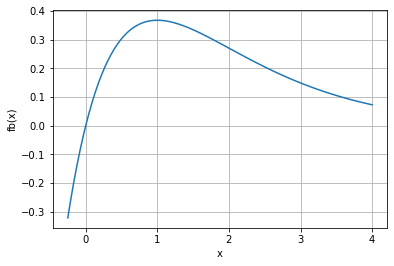

In [39]:
x = np.linspace(-.25,4,100)
y = fb(x)
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('fb(x)')
plt.show()

In [40]:
x0b = .5
xb = newton(fb, dfb, x0b, tol, print_info=True)

k =  1, x = -5.00000000e-01, f(x) = -8.24360635e-01, dx =  1.00000000e+00
k =  2, x = -1.66666667e-01, f(x) = -1.96893402e-01, dx = -3.33333333e-01
k =  3, x = -2.38095238e-02, f(x) = -2.43832198e-02, dx = -1.42857143e-01
k =  4, x = -5.53709856e-04, f(x) = -5.54016536e-04, dx = -2.32558140e-02
k =  5, x = -3.06424934e-07, f(x) = -3.06425028e-07, dx = -5.53403431e-04
k =  6, x = -9.38962115e-14, f(x) = -9.38962115e-14, dx = -3.06424840e-07
terminated after 6 iterations
x = -9.389621148813321e-14, f(x) = -9.389621148814203e-14


### c)

In [41]:
def fc(x):
    return log(x)  
def dfc(x):
    return 1./x
    
x0c = 3.
xc = newton(fc, dfc, x0c, tol, print_info=True)

ValueError: math domain error

In [42]:
x0c = 2.
xc = newton(fc, dfc, x0c, tol, print_info=True)

k =  1, x =  6.13705639e-01, f(x) = -4.88239881e-01, dx =  1.38629436e+00
k =  2, x =  9.13341207e-01, f(x) = -9.06457473e-02, dx = -2.99635568e-01
k =  3, x =  9.96131703e-01, f(x) = -3.87579776e-03, dx = -8.27904963e-02
k =  4, x =  9.99992508e-01, f(x) = -7.49155322e-06, dx = -3.86080503e-03
k =  5, x =  1.00000000e+00, f(x) = -2.80615531e-11, dx = -7.49149710e-06
k =  6, x =  1.00000000e+00, f(x) =  0.00000000e+00, dx = -2.80615531e-11
terminated after 6 iterations
x = 1.0, f(x) = 0.0


### d)

In [47]:
def fd(x):
    return sin(x)
def dfd(x):
    return cos(x)
    
x0d = atan(-2.*pi)
xd = newton(fd, dfd, x0d, tol, print_info=True)

-1.4129651365067377
k =  1, x =  4.87022017e+00, f(x) = -9.87570492e-01, dx = -6.28318531e+00
k =  2, x =  1.11534055e+01, f(x) = -9.87570492e-01, dx = -6.28318531e+00
k =  3, x =  1.74365908e+01, f(x) = -9.87570492e-01, dx = -6.28318531e+00
k =  4, x =  2.37197761e+01, f(x) = -9.87570492e-01, dx = -6.28318531e+00
k =  5, x =  3.00029614e+01, f(x) = -9.87570492e-01, dx = -6.28318531e+00
k =  6, x =  3.62861468e+01, f(x) = -9.87570482e-01, dx = -6.28318537e+00
k =  7, x =  4.25693295e+01, f(x) = -9.87570881e-01, dx = -6.28318277e+00
k =  8, x =  4.88526149e+01, f(x) = -9.87555155e-01, dx = -6.28328533e+00
k =  9, x =  5.51318540e+01, f(x) = -9.88168097e-01, dx = -6.27923910e+00
k = 10, x =  6.15746884e+01, f(x) = -9.51219419e-01, dx = -6.44283445e+00
k = 11, x =  6.46579060e+01, f(x) =  9.67598548e-01, dx = -3.08321754e+00
k = 12, x =  6.84900756e+01, f(x) = -5.85067090e-01, dx = -3.83216964e+00
k = 13, x =  6.92115034e+01, f(x) =  9.63155291e-02, dx = -7.21427851e-01
k = 14, x =  6.911

In [46]:
#Das ist x = 22*pi:
xd/pi  

22.000000000000004

In [53]:
x0d *= 1.001  #kleine Änderung
xd = newton(fd, dfd, x0d, tol, print_info=True)

k =  1, x =  4.99030019e+00, f(x) = -9.61630590e-01, dx = -6.40624855e+00
k =  2, x =  8.49545413e+00, f(x) =  8.01215520e-01, dx = -3.50515394e+00
k =  3, x =  9.83443779e+00, f(x) = -3.98297326e-01, dx = -1.33898366e+00
k =  4, x =  9.40021096e+00, f(x) =  2.45645333e-02, dx =  4.34226832e-01
k =  5, x =  9.42478290e+00, f(x) = -4.94356459e-06, dx = -2.45719479e-02
k =  6, x =  9.42477796e+00, f(x) =  3.67394040e-16, dx =  4.94356459e-06
k =  7, x =  9.42477796e+00, f(x) =  3.67394040e-16, dx = -3.67394040e-16
terminated after 7 iterations
x = 9.42477796076938, f(x) = 3.6739403974420594e-16


In [54]:
#Das ist x = 3*pi:
xd/pi

3.0

### e)

In [56]:
def fe(x):
    return x**3 - 2.*x + 2.
def dfe(x):
    return 3.*x**2 - 2.
    
x0e = 0  #Divergenz (periodisch)
xe = newton(fe, dfe, x0e, tol, print_info=True)

k =  1, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k =  2, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k =  3, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k =  4, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k =  5, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k =  6, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k =  7, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k =  8, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k =  9, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k = 10, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k = 11, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k = 12, x =  0.00000000e+00, f(x) =  2.00000000e+00, dx =  1.00000000e+00
k = 13, x =  1.00000000e+00, f(x) =  1.00000000e+00, dx = -1.00000000e+00
k = 14, x =  0.00000000e+00, f(x) =  2

In [67]:
x0e = 2  #Konvergenz
xe = newton(fe, dfe, x0e, tol, print_info=True)

k =  1, x =  1.40000000e+00, f(x) =  1.94400000e+00, dx =  6.00000000e-01
k =  2, x =  8.98969072e-01, f(x) =  9.28559570e-01, dx =  5.01030928e-01
k =  3, x = -1.28877933e+00, f(x) =  2.43695785e+00, dx =  2.18774840e+00
k =  4, x = -2.10576730e+00, f(x) = -3.12597651e+00, dx =  8.16987971e-01
k =  5, x = -1.82919995e+00, f(x) = -4.62052755e-01, dx = -2.76567349e-01
k =  6, x = -1.77171581e+00, f(x) = -1.79434165e-02, dx = -5.74841384e-02
k =  7, x = -1.76929656e+00, f(x) = -3.10942024e-05, dx = -2.41925091e-03
k =  8, x = -1.76929235e+00, f(x) = -9.39386346e-11, dx = -4.20690445e-06
k =  9, x = -1.76929235e+00, f(x) =  0.00000000e+00, dx = -1.27095477e-11
terminated after 9 iterations
x = -1.7692923542386314, f(x) = 0.0


In [73]:
x0e = 10   #Divergenz (periodischer Attraktor)
xe = newton(fe, dfe, x0e, tol, print_info=True)

k =  1, x =  6.70469799e+00, f(x) =  2.89986726e+02, dx =  3.29530201e+00
k =  2, x =  4.52203149e+00, f(x) =  8.54259132e+01, dx =  2.18266650e+00
k =  3, x =  3.08258363e+00, f(x) =  2.51265345e+01, dx =  1.43944785e+00
k =  4, x =  2.13466168e+00, f(x) =  7.45786132e+00, dx =  9.47921952e-01
k =  5, x =  1.49561771e+00, f(x) =  2.35427046e+00, dx =  6.39043969e-01
k =  6, x =  9.95838073e-01, f(x) =  9.95889966e-01, dx =  4.99779638e-01
k =  7, x = -2.55033104e-02, f(x) =  2.05099003e+00, dx =  1.02134138e+00
k =  8, x =  1.00099319e+00, f(x) =  1.00099615e+00, dx = -1.02649650e+00
k =  9, x =  5.92967774e-03, f(x) =  1.98814085e+00, dx =  9.95063507e-01
k = 10, x =  1.00005254e+00, f(x) =  1.00005254e+00, dx = -9.94122858e-01
k = 11, x =  3.15132587e-04, f(x) =  1.99936973e+00, dx =  9.99737403e-01
k = 12, x =  1.00000015e+00, f(x) =  1.00000015e+00, dx = -9.99685016e-01
k = 13, x =  8.93588625e-07, f(x) =  1.99999821e+00, dx =  9.99999255e-01
k = 14, x =  1.00000000e+00, f(x) =  1

## Aufgabe 4

In [74]:
def newton_simplified(f, df, x0, tol, maxits=100, termination_criterion='x', print_info=False):

    if df(x0) == 0:
        raise Exception('df(x0) = 0 is not allowed')
        
    df0 = df(x0)

    def check_termination_criterion(x, dx, tol):
        if termination_criterion == 'x':
            return abs(dx) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = x0
    k = 0
    terminate=False
    while k < maxits and not terminate:
        dx = f(x)/df0   #Hier die Änderung ggü. dem ursprünglichen Newton-Verfahren
        x -= dx
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}, f(x) = {:15.8e}, dx = {:15.8e}'.format(k, x, f(x), dx))
        terminate = check_termination_criterion(x, dx, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

In [75]:
def f(x):
    return np.exp(-x) - np.sin(x)
def df(x):
    return -np.exp(-x) - np.cos(x)
x0 = 1.
tol = 1e-6
x_newton = newton(f, df, x0, tol, print_info=True)

k =  1, x =  4.78527789e-01, f(x) =  1.59222211e-01, dx =  5.21472211e-01
k =  2, x =  5.84157019e-01, f(x) =  6.07930613e-03, dx = -1.05629230e-01
k =  3, x =  5.88525112e-01, f(x) =  1.05845200e-05, dx = -4.36809280e-03
k =  4, x =  5.88532744e-01, f(x) =  3.23333582e-11, dx = -7.63175116e-06
k =  5, x =  5.88532744e-01, f(x) =  0.00000000e+00, dx = -2.33134476e-11
terminated after 5 iterations
x = 0.5885327439818611, f(x) = 0.0


In [76]:
x_newton = newton_simplified(f, df, x0, tol, print_info=True)

k =  1, x =  4.78527789e-01, f(x) =  1.59222211e-01, dx =  5.21472211e-01
k =  2, x =  6.53847554e-01, f(x) = -8.82038576e-02, dx = -1.75319765e-01
k =  3, x =  5.56726182e-01, f(x) =  4.46725659e-02, dx =  9.71213723e-02
k =  4, x =  6.05915197e-01, f(x) = -2.39397000e-02, dx = -4.91890154e-02
k =  5, x =  5.79555165e-01, f(x) =  1.24956896e-02, dx =  2.63600321e-02
k =  6, x =  5.93314184e-01, f(x) = -6.61866918e-03, dx = -1.37590186e-02
k =  7, x =  5.86026359e-01, f(x) =  3.47958503e-03, dx =  7.28782449e-03
k =  8, x =  5.89857734e-01, f(x) = -1.83665096e-03, dx = -3.83137521e-03
k =  9, x =  5.87835396e-01, f(x) =  9.67420211e-04, dx =  2.02233855e-03
k = 10, x =  5.88900623e-01, f(x) = -5.10135838e-04, dx = -1.06522754e-03
k = 11, x =  5.88338912e-01, f(x) =  2.68845618e-04, dx =  5.61711177e-04
k = 12, x =  5.88634938e-01, f(x) = -1.41727428e-04, dx = -2.96026229e-04
k = 13, x =  5.88478882e-01, f(x) =  7.47023663e-05, dx =  1.56056239e-04
k = 14, x =  5.88561137e-01, f(x) = -3

Konvergenz, aber langsamer (nur linear).